# Churn_Modelling

Rotación de clientes

In [1]:
# Importando las librerías que se van a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import sys
import platform

In [2]:
# Versiones de las librerías
print("Python version:", sys.version)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Sistema:", platform.platform())

Python version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Numpy version: 1.19.5
Pandas version: 1.1.5
Seaborn version: 0.11.2
Sistema: Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic


# Fuente de la base de datos:
https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data

## Parte 1 - Pre procesado de datos


### Importar el data set


In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/jrtorresb/Proyecto_Final_FC_Proyecto_II/main/Churn_Modelling.csv")

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Número de filas y columnas
print(f'{dataset.shape[0]} filas \n{dataset.shape[1]} columnas') 

10000 filas 
14 columnas


Para el análisis no es necesario contar con las columnas RowNumber, CusomerId y Surname así que se eliminan del dataset.

In [ ]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [ ]:
# Revisar duplicidad de los datos, No hay filas repetidas.
dataset.duplicated().sum()

0

In [ ]:
# Lista de Columnas
dataset.columns.tolist()

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
# Tipos de datos de las columnas
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Total de nulos en bruto y porcentaje dataset original
total = dataset.isnull().sum()
pctg = dataset.isnull().sum() / dataset.isnull().count()*100
missing_data = pd.concat([total, pctg], axis = 1, keys = ['total', 'pctg'])
missing_data

,total,pctg
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0
EstimatedSalary,0,0.0


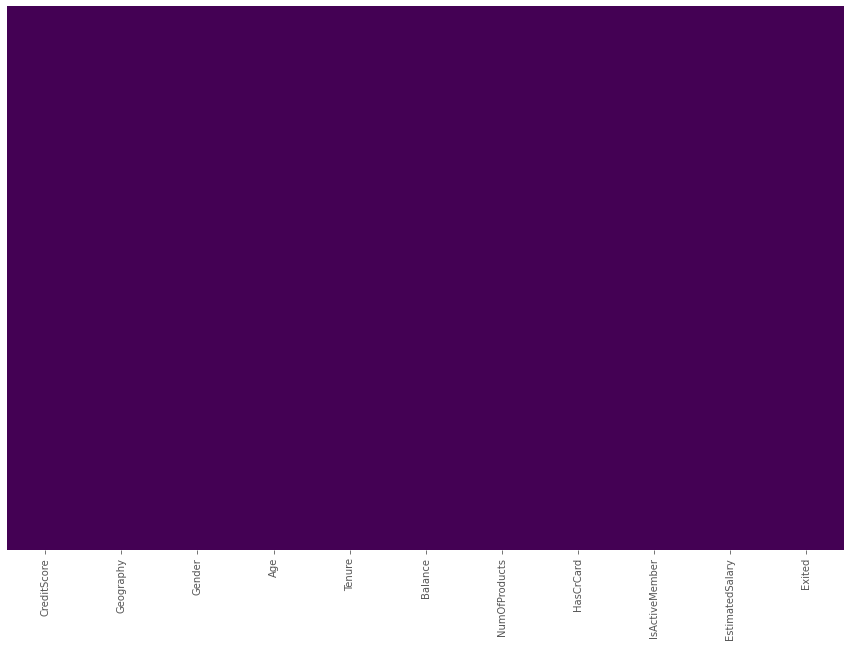

In [ ]:
# Mapa de calor para valores faltantes, en amarillo los que faltan
plt.figure(figsize = (15,10))
_=sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
# Total de nulos 
na = dataset.isnull().sum().sum()/len(dataset)*100
print('Nulos: %.2f%%' % na)

Nulos: 0.00%


In [ ]:
# Estadisticos básicos
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


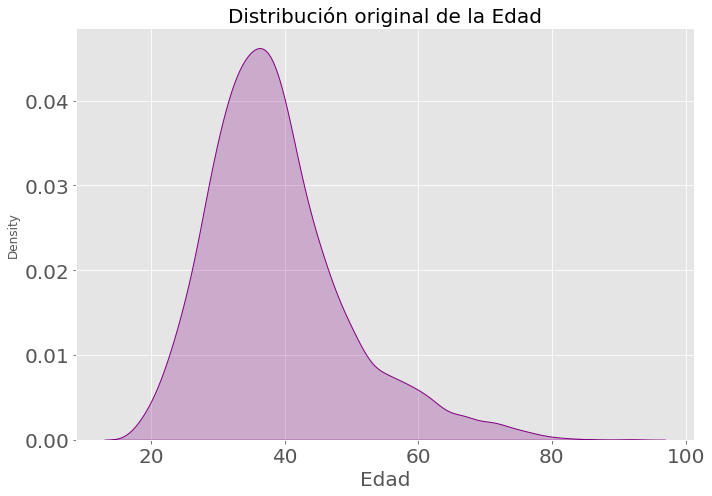

In [ ]:
# Distribución EDAD
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.distplot(
    dataset['Age'],
    hist    = False,
    #rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},

)
axes.set_title("Distribución original de la Edad", fontsize = 20 )
axes.set_xlabel('Edad', fontsize=20) 
axes.tick_params(labelsize = 20)
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


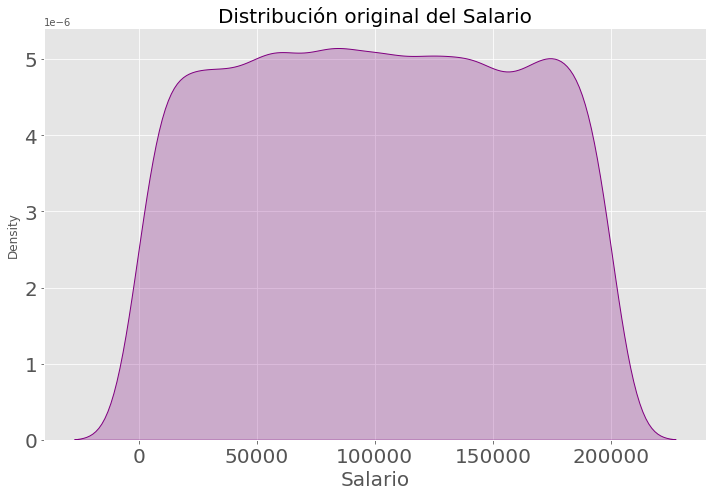

In [ ]:
# Distribución del Salario
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.distplot(
    dataset['EstimatedSalary'],
    hist    = False,
    #rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},

)
axes.set_title("Distribución original del Salario", fontsize = 20 )
axes.set_xlabel('Salario', fontsize=20) 
axes.tick_params(labelsize = 20)
fig.tight_layout()

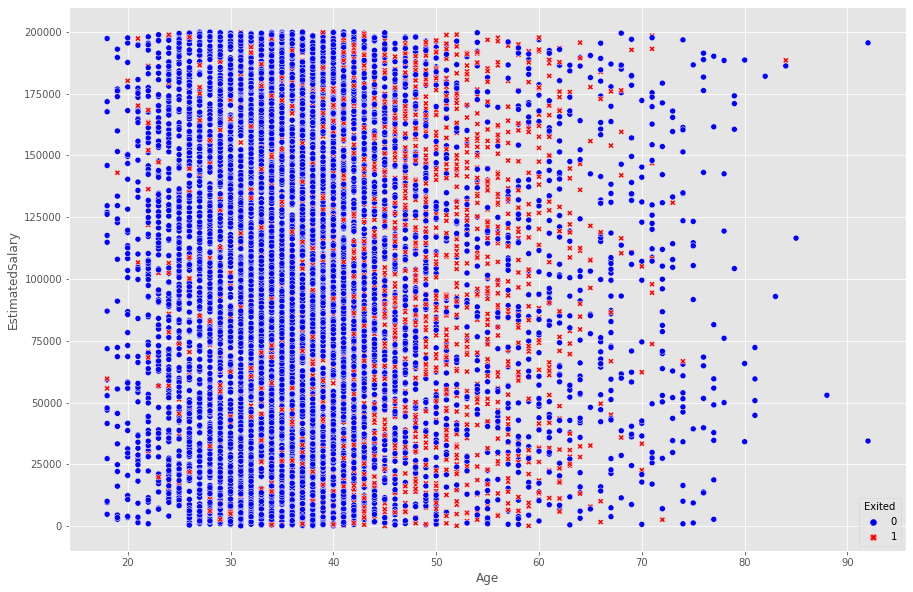

In [ ]:
# Grafica de dispersión EDAD vs Salario desagregada por clasificación
plt.figure(figsize=(15,10))
hue_colors = {0:'blue',
             1: 'red'}
sns.scatterplot(x='Age', 
                y='EstimatedSalary', 
                data=dataset, 
                hue='Exited', 
                palette=hue_colors, 
                style='Exited')
plt.show()

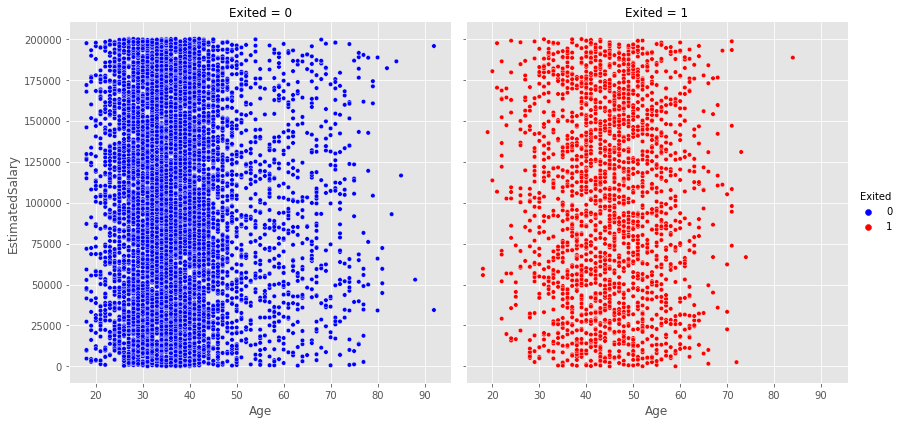

In [ ]:
# Gráfica de dispersió de la edad contra el monto desagregada por Clasificacion
sns.relplot(x='Age',
           y='EstimatedSalary',
           data=dataset,
           kind='scatter',
           hue='Exited',
           col='Exited',
           s=20,
           palette=hue_colors,
           height=6)
plt.show()

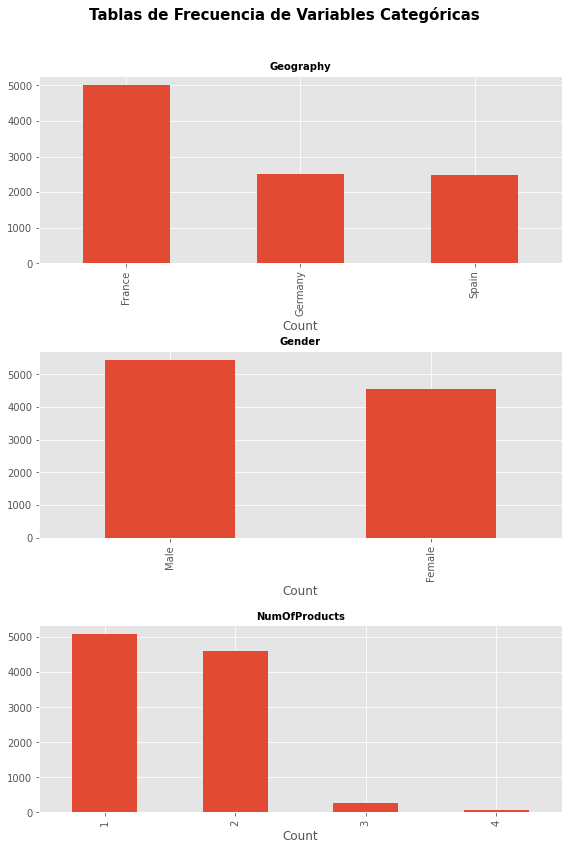

In [ ]:
# Gráfica de barras para cada variable cualitativa
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
axes = axes.flat
columnas_object = dataset.select_dtypes(["object"]).columns.tolist() + ["NumOfProducts"]

for i, colum in enumerate(columnas_object):
    dataset[colum].value_counts().plot.bar(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("Count")

# Se eliminan los axes vacíos
#for i in [8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Tablas de Frecuencia de Variables Categóricas',
             fontsize = 15, fontweight = "bold");

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


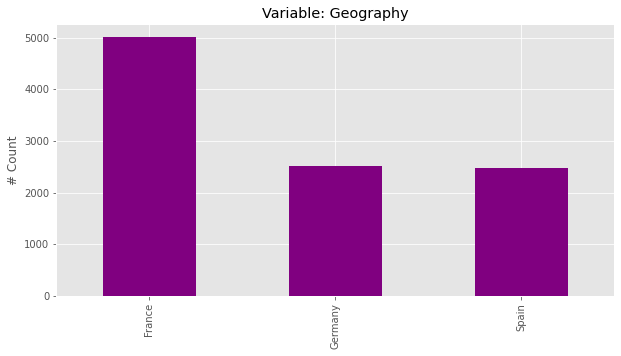

----------------------------------------------------------------------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64


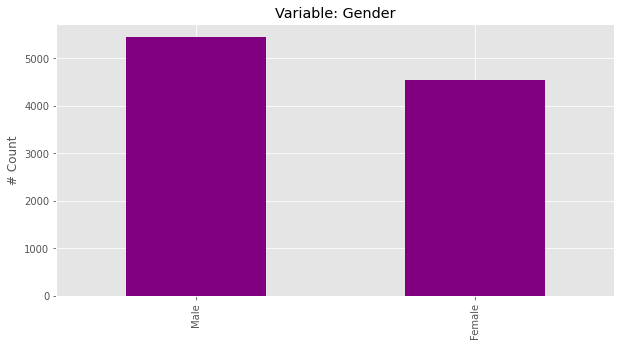

----------------------------------------------------------------------------------------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


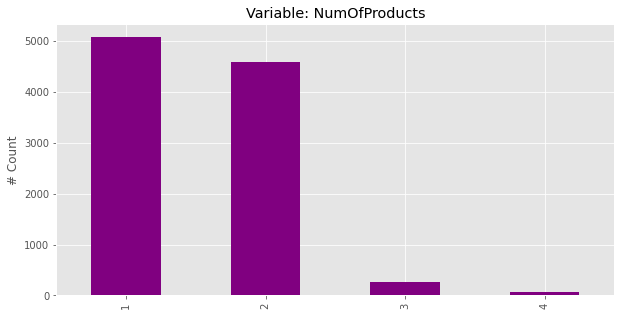

----------------------------------------------------------------------------------------------------


In [ ]:
# Count plots de variables categoricas
var_cat = dataset.select_dtypes(["object"]).columns.tolist() + ["NumOfProducts"]

for i in var_cat:
    print(dataset[i].value_counts())
    dataset[i].value_counts().plot(kind='bar', color='purple', figsize=(10,5))
    plt.title("Variable: " + i)
    plt.ylabel("# Count")
    #plt.xticks(rotation=-45)
    plt.show()
    print('-'*100)

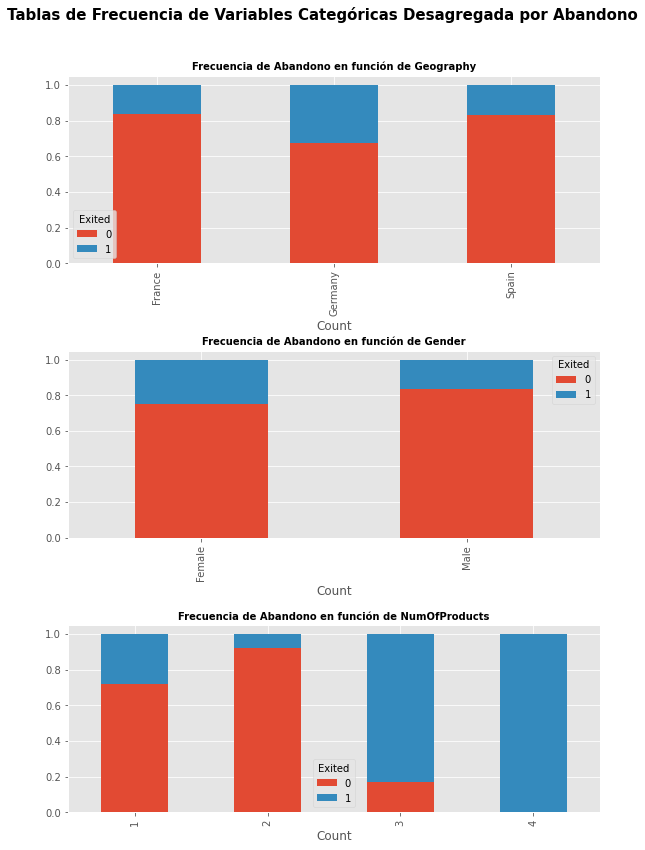

In [ ]:
# Gráfica de barras para cada variable cualitativa
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
axes = axes.flat
columnas_object = dataset.select_dtypes(["object"]).columns.tolist() + ["NumOfProducts"]

for i, colum in enumerate(columnas_object):

    table = pd.crosstab(dataset[colum], dataset['Exited'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = axes[i]) #sum(1) suma por filas
    axes[i].set_title("Frecuencia de Abandono en función de "+colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("Count")


# Se eliminan los axes vacíos
#for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Tablas de Frecuencia de Variables Categóricas Desagregada por Abandono',
             fontsize = 15, fontweight = "bold");    

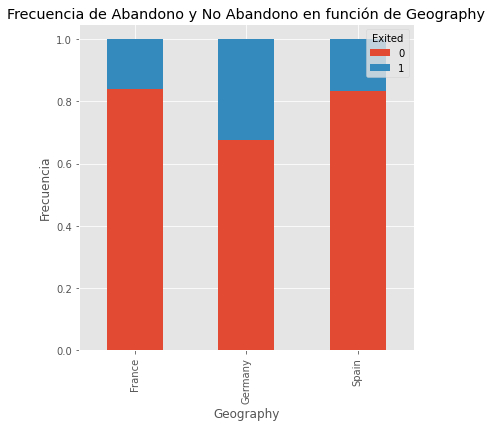

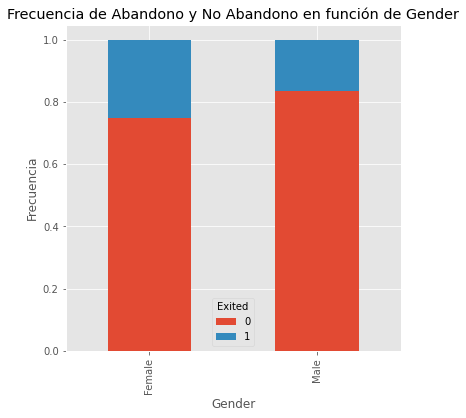

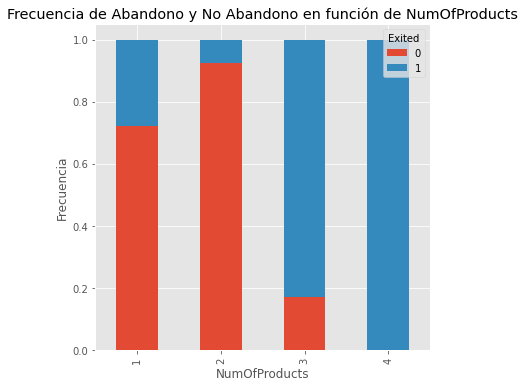

In [ ]:
# Tablas de contingencia normalizadas Variables categoricas contra variable objetivo
var_cat = dataset.select_dtypes(["object"]).columns.tolist() + ["NumOfProducts"]
for v_cat in var_cat:
    table = pd.crosstab(dataset[v_cat], dataset['Exited'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6)) #sum(1) suma por filas
    plt.title("Frecuencia de Abandono y No Abandono en función de "+v_cat)
    #plt.xlabel(v_cat)  
    plt.ylabel("Frecuencia")
    plt.show()

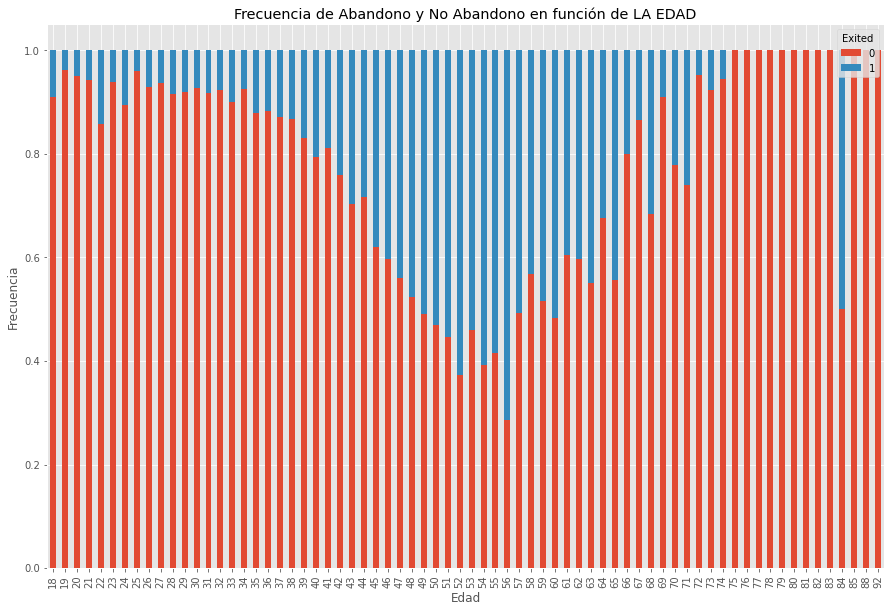

In [ ]:
# Tabla de contingencia de la edad vs su Clasificacion
table = pd.crosstab(dataset['Age'], dataset['Exited'])
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,10)) #sum(1) suma por filas
plt.title("Frecuencia de Abandono y No Abandono en función de LA EDAD")
plt.xlabel("Edad") 
plt.ylabel("Frecuencia")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

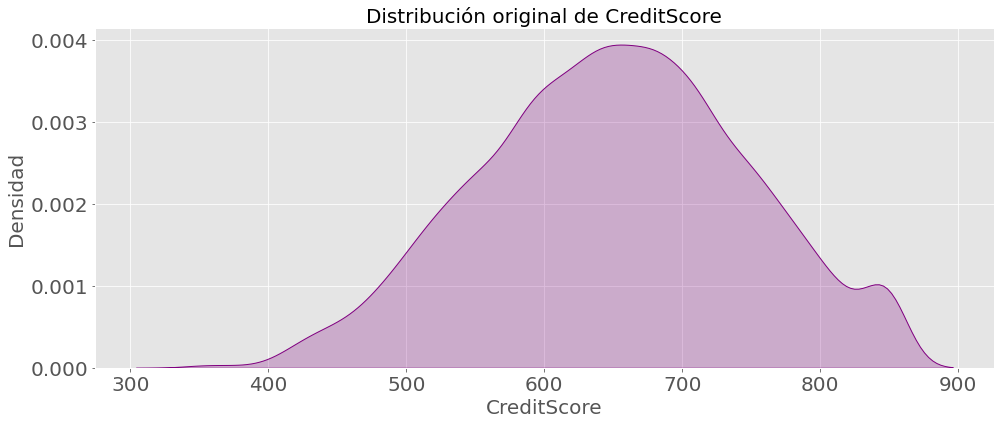

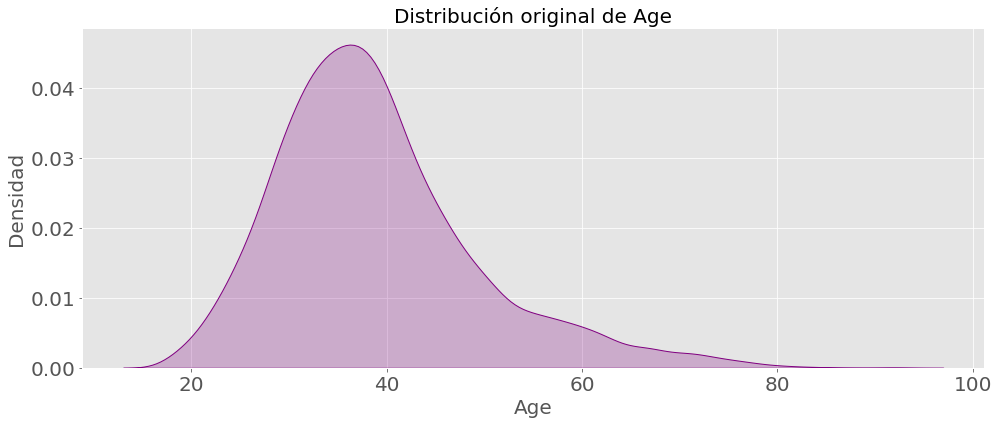

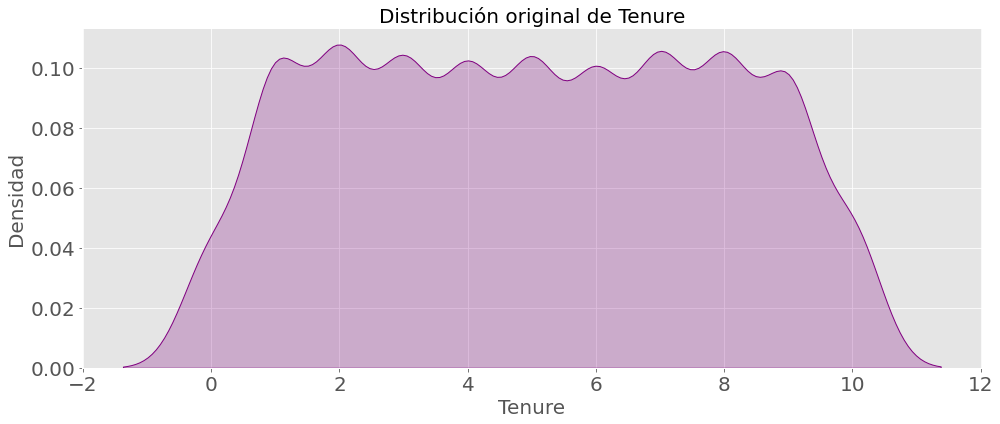

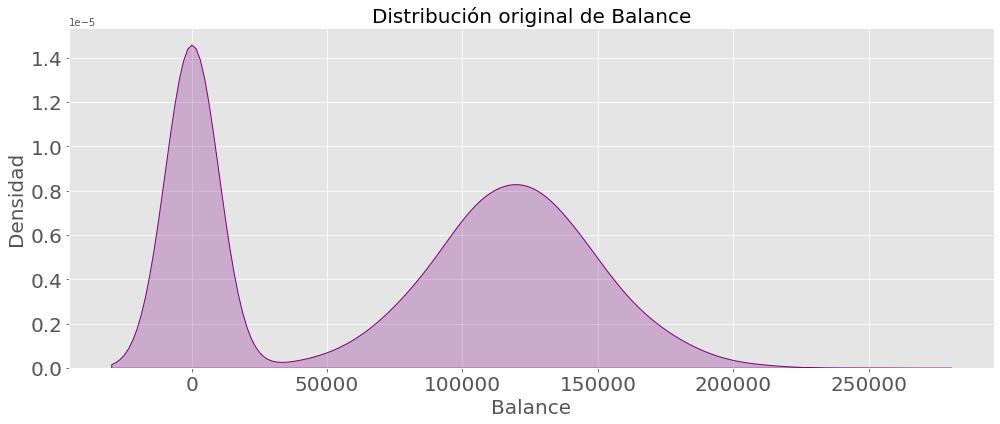

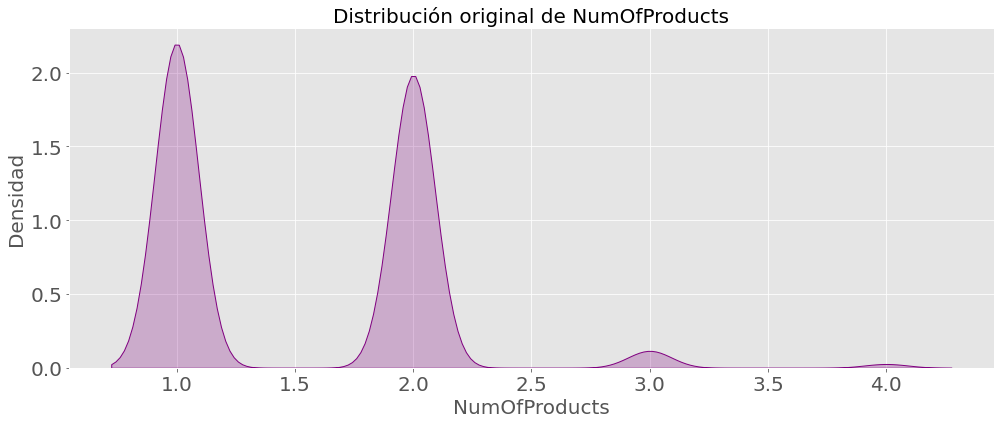

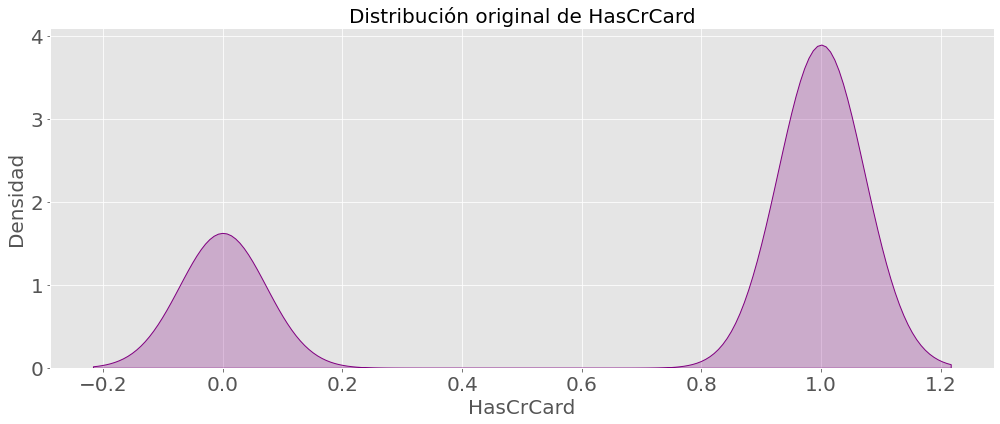

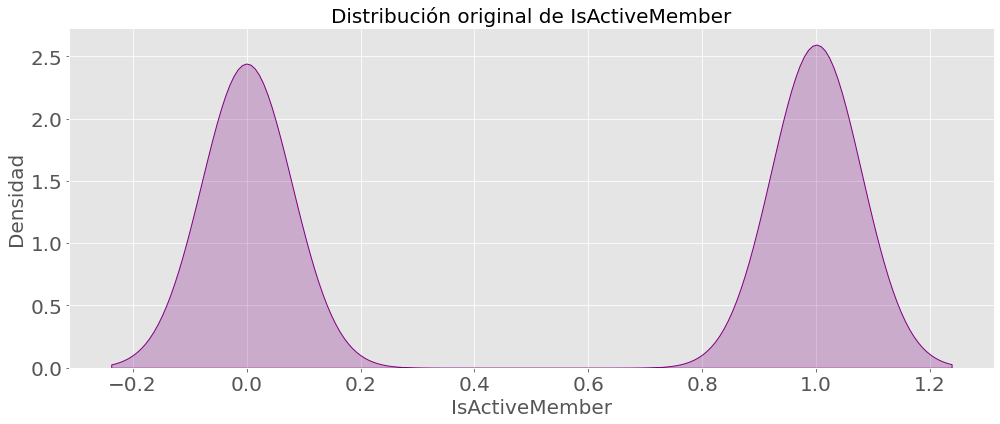

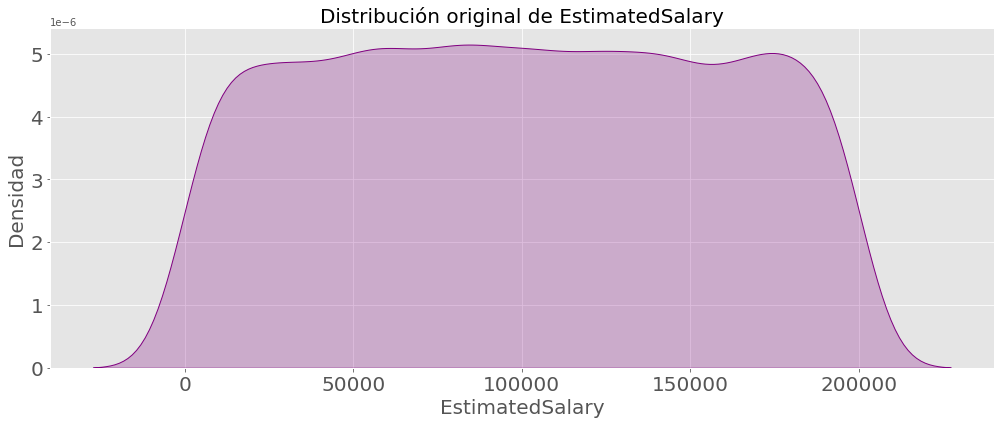

In [ ]:
# Gráfico de distribución para cada variable numérica
columnas_numeric = dataset.select_dtypes(include=['float64', 'int', 'int64']).columns

for i in columnas_numeric[:-1]:
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
  sns.distplot(
      dataset[i],
      hist    = False,
      rug     = False,
      color   = "purple",
      kde_kws = {'shade': True, 'linewidth': 1},

  )
  axes.set_title("Distribución original de "+i, fontsize = 20 )
  axes.set_xlabel(i, fontsize=20) 
  axes.set_ylabel('Densidad', fontsize=20) 
  axes.tick_params(labelsize = 20)
  fig.tight_layout()

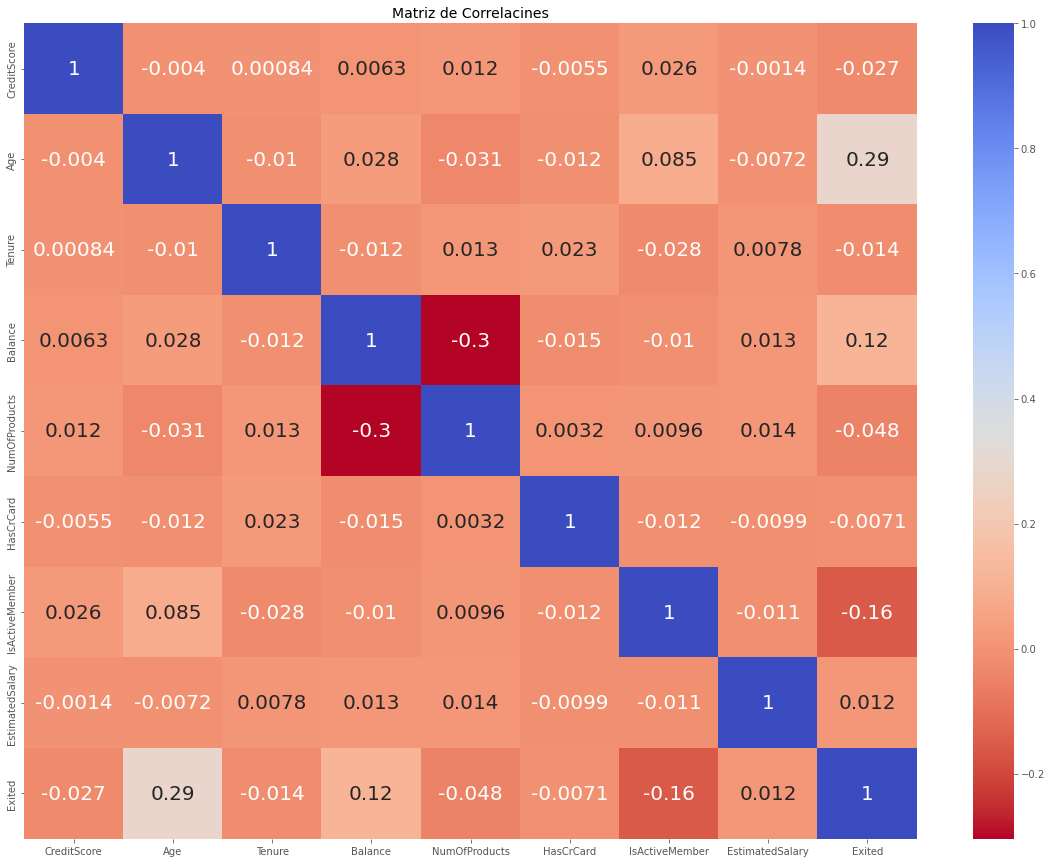

In [ ]:
# Matriz de Correlaciones, no se presenta Multicolinealidad
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Matriz de Correlaciones', fontsize=14)
plt.show()

In [ ]:
# Ditribución en porcentaje de Geography
ptotal = dataset['Geography'].value_counts()
ppctg = ptotal/len(dataset)*100
productos = pd.concat([ptotal, ppctg], axis = 1, keys = ['total', 'pctg'])
productos

,total,pctg
France,5014,50.14
Germany,2509,25.09
Spain,2477,24.77


In [ ]:
# Ditribución en porcentaje de Genero
ptotal = dataset['Gender'].value_counts()
ppctg = ptotal/len(dataset)*100
productos = pd.concat([ptotal, ppctg], axis = 1, keys = ['total', 'pctg'])
productos

,total,pctg
Male,5457,54.57
Female,4543,45.43


In [ ]:
# Ditribución en porcentaje de Genero
ptotal = dataset['Exited'].value_counts()
ppctg = ptotal/len(dataset)*100
productos = pd.concat([ptotal, ppctg], axis = 1, keys = ['total', 'pctg'])
productos

,total,pctg
0,7963,79.63
1,2037,20.37


In [ ]:
# Variable Objetivo en porcentaje del dataset 
print('No Fraude: ', round(dataset['Exited'].value_counts()[0]/len(dataset) * 100,2), '% del dataset')
print('Fraude: ', round(dataset['Exited'].value_counts()[1]/len(dataset) * 100,2), '% del dataset')
# Se tienen clases desbalanceadas

No Fraude:  79.63 % del dataset
Fraude:  20.37 % del dataset


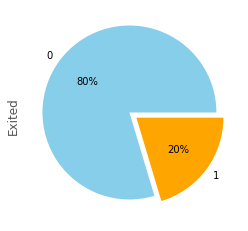

In [ ]:
dataset.Exited.value_counts().plot(kind='pie', autopct="%1.0f%%", colors=['skyblue', 'orange'], explode=(0.05, 0.05))

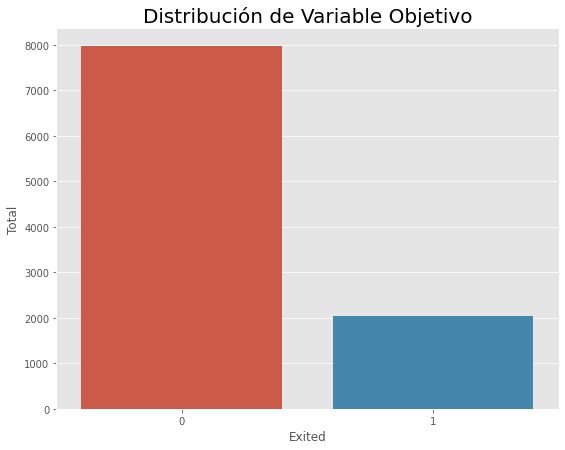

In [ ]:
# Distribución de la variable objetivo
plt.figure(figsize=(9,7))
sns.countplot(x='Exited', data=dataset)
plt.title("Distribución de Variable Objetivo", fontsize=20)
plt.ylabel("Total")
plt.show()

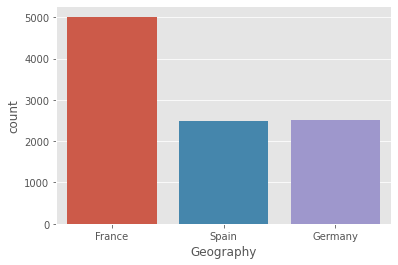

In [ ]:
# Gráfica Nacionalidades
sns.countplot(x='Geography', data=dataset)
plt.show()

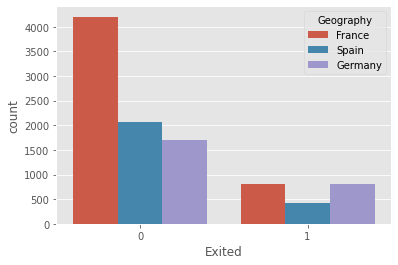

In [ ]:
# Numero de salidas y no salidas desagregado por país
sns.countplot(x='Exited', hue="Geography", data=dataset)
plt.show()

In [ ]:
# Separando Variables categóricas y numéricas
var_cat = dataset.select_dtypes(["object"]).columns.tolist()
print("Variables Categóricas: ")
print(var_cat)  
print()
var_num=[i for i in dataset.columns.tolist() if i not in var_cat]
print("Variables Numéricas: ")
print(var_num)

Variables Categóricas: 
['Geography', 'Gender']

Variables Numéricas: 
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [ ]:
# Librerías 
from collections import Counter

# Transformaciones
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer, MaxAbsScaler

# Algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 

# Redes Neuronales Importar Keras y librerías adicionales
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
dataset.columns.tolist()

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Separando Variables categóricas y numéricas
var_cat = dataset.select_dtypes(["object"]).columns.tolist()
print("Variables Categóricas: ")
print(var_cat)  
print()
var_num=[i for i in dataset.columns.tolist() if i not in var_cat]
print("Variables Numéricas: ")
print(var_num)

Variables Categóricas: 
['Geography', 'Gender']

Variables Numéricas: 
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [ ]:
# Vamos a mezclar los datos antes de crear las submuestras.
dataset = dataset.sample(frac=1)

In [ ]:
# Separando features y variable objetivo
X=dataset.drop('Exited', axis=1)
y=dataset['Exited']

In [ ]:
# Datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [ ]:
# UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2022)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# OVERSAMPLING
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=2022)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
# Verificar que las clases se hayan balanceado
print('Dataset sin balancear %s' % Counter(y_train))
print('Dataset balanceado %s' % Counter(y_train_rus))

Dataset sin balancear Counter({0: 6384, 1: 1616})
Dataset balanceado Counter({0: 6384, 1: 6384})


In [ ]:
# Transformaciones que se van a agregar al Pipeline
# Variables Numéricas
numeric_features = var_num[:-1]
numeric_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


# Variables Categóricas
categorical_features = var_cat
categorical_transformer = Pipeline(steps=[
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('OneHot', OneHotEncoder(handle_unknown='ignore', drop='first'))]) #drop=first quita una columna transformada


# Uniendo las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Empaquetando el pipeline
def my_pipeline(model):

    # Uniendo los pipelines con el algoritmo que se a a aplicar
    # ('best', SelectKBest(score_func=f_classif, k = 5))
    steps = [('preprocessor', preprocessor),
            ('classifier', model)]

    # Pipeline Final
    pipeline = Pipeline(steps = steps)
    
    return pipeline

## Rgresión Logística

In [ ]:
lr_pipeline =  my_pipeline(LogisticRegression(max_iter=500))
# Pipeline
lr_pipeline.fit(X_train_rus, y_train_rus)
print("model score: %.3f" % lr_pipeline.score(X_train_rus, y_train_rus))
print("model score: %.3f" % lr_pipeline.score(X_test, y_test))

model score: 0.705
model score: 0.702


In [ ]:
# Dataset transformado
# Convertir el output en dataframe y añadir el nombre de las columnas
# X_train_prep = preprocessor.fit_transform(X_train_rus)
# X_test_prep  = preprocessor.transform(X_test)
# CATEGORIAS
#lr_pipeline.steps[0][1].named_transformers_['cat']['OneHot'].categories_

encoded_cat = lr_pipeline.steps[0][1].named_transformers_['cat']['OneHot'].get_feature_names(categorical_features)
labels = np.concatenate([numeric_features, encoded_cat])
datos_train_prep = preprocessor.transform(X_train_rus)
#datos_train_prep = pd.DataFrame(datos_train_prep.toarray(), columns=labels)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.472559,0.472234,0.357006,-1.331683,0.718382,0.647775,-0.910619,1.639578,0.0,0.0,1.0
1,1.797461,0.000893,0.014383,1.050309,0.718382,-1.543745,-0.910619,1.389824,0.0,1.0,1.0
2,-0.547921,-0.187643,1.384873,0.886962,-0.756976,0.647775,1.098155,0.883466,0.0,0.0,0.0
3,0.436936,0.189430,-1.013484,-0.209296,0.718382,-1.543745,-0.910619,1.106711,1.0,0.0,0.0
4,-2.304420,0.000893,0.357006,1.160449,-0.756976,0.647775,-0.910619,-1.547847,0.0,0.0,1.0


In [ ]:
# Flujo Pipeline
from sklearn import set_config
set_config(display='diagram')
lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LogisticRegression(max_iter=500))])

In [ ]:
# Predicciones del modelo
y_pred = lr_pipeline.predict(X_test)

# Accuracy
print(accuracy_score(y_test, y_pred))

# Precision
print(precision_score(y_test, y_pred))

# Recall
print(recall_score(y_test, y_pred)) 
    
# f1 score
print(f1_score(y_test, y_pred))

# Reporte    
print(classification_report(y_test, y_pred))

0.703
0.38543046357615895
0.6912114014251781
0.49489795918367346
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1579
           1       0.39      0.69      0.49       421

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.73      2000



In [ ]:
# Se crea un dataframe con valor real y las predicciones
df_predicciones = pd.DataFrame({'Real' : y_test, 'prediccion' : y_pred})
df_predicciones.head()

,Real,prediccion
1955,1,1
8233,0,0
156,0,0
8623,0,1
6962,0,1


Matriz de confusión
[[1115  464]
 [ 130  291]]


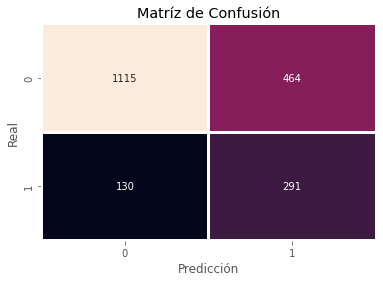

In [ ]:
# Matriz de Confusión
print("Matriz de confusión")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

df_cm = pd.crosstab(df_predicciones['Real'], df_predicciones['prediccion'], rownames=['Real'], colnames=['Predicción'])
sns.heatmap(df_cm, annot=True, fmt="d", linewidths=2, cbar=False)
plt.title("Matríz de Confusión")
plt.show()

AUC:  0.7691494210683871
AUC: 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


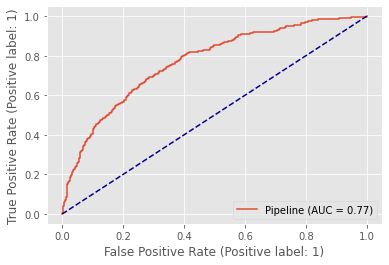

In [ ]:
# Probabilidades
probs = lr_pipeline.predict_proba(X_test)
probs = probs[:,1]

auc = roc_auc_score(y_test, probs)
print('AUC: ', auc) 
print('AUC: %.2f' % auc)

# Curva ROC
plot_roc_curve(lr_pipeline, X_test, y_test)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [ ]:
# Evaluando el Pipeline usando Validación Cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# precision, recall, f1, roc_auc
scores = cross_val_score(lr_pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# Resumen rendimiento del modelo
print('Acurracy: %.3f +/- (%.3f)' % (np.mean(scores), np.std(scores)))

Acurracy: 0.766 +/- (0.021)


In [ ]:
# No jala
# from sklearn.externals import joblib

# Guardar modelo con jolib
import joblib

# Guardar en jobllib
joblib.dump(lr_pipeline, 'model.joblib')

# Guardar en pkl
joblib.dump(lr_pipeline, 'model_2.pkl')

['model_2.pkl']

In [ ]:
# Cargar
mi_modelo = joblib.load('model.joblib')

In [ ]:
# Prueba
mi_modelo.score(X_test, y_test)

0.703

In [ ]:
# Guardar modelo con pickle
import pickle

In [ ]:
with open('model.pkl','wb') as file:
    pickle.dump(lr_pipeline,file)

In [ ]:
with open('model.pkl', 'rb') as file:
    mi_modelo_pkl = pickle.load(file)

In [ ]:
mi_modelo_pkl.score(X_test, y_test)

0.703

In [ ]:
# Busnado Hiperparámetros con GridSearch, cuidad con el costo computacional
'''
param_grid = {
    'classifier__C': np.logspace(-1, 1, 4),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
}


grid = GridSearchCV(lr_pipeline, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=10)
grid.fit(X_train_rus, y_train_rus)


print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
'''

'\nparam_grid = {\n    \'classifier__C\': np.logspace(-1, 1, 4),\n    \'classifier__penalty\': [\'l1\', \'l2\'],\n    \'classifier__solver\': [\'newton-cg\', \'lbfgs\', \'liblinear\']\n}\n\n\ngrid = GridSearchCV(lr_pipeline, param_grid=param_grid, scoring=\'roc_auc\', n_jobs=-1, cv=10)\ngrid.fit(X_train_rus, y_train_rus)\n\n\nprint("Best parameter (CV score=%0.3f):" % grid.best_score_)\nprint(grid.best_params_)\n'

## Decision Tree

In [ ]:
# Definiendo el Pipeline
tree_pipeline =  my_pipeline(DecisionTreeClassifier(max_depth=20)) # Checar: class_weight=None, podar el árbol

In [ ]:
# Pipeline
tree_pipeline.fit(X_train_rus, y_train_rus)
print("model score: %.3f" % tree_pipeline.score(X_train_rus, y_train_rus))
print("model score: %.3f" % tree_pipeline.score(X_test, y_test))

model score: 0.997
model score: 0.793


In [ ]:
# Flujo Pipeline
from sklearn import set_config
set_config(display='diagram')
tree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', DecisionTreeClassifier(max_depth=20))])

In [ ]:
# Predicciones del modelo
y_pred = tree_pipeline.predict(X_test)

# Accuracy
print(accuracy_score(y_test, y_pred))

# Precision
print(precision_score(y_test, y_pred))

# Recall
print(recall_score(y_test, y_pred)) 
    
# f1 score
print(f1_score(y_test, y_pred))

# Reporte    
print(classification_report(y_test, y_pred))

0.793
0.5085995085995086
0.4916864608076009
0.5
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1579
           1       0.51      0.49      0.50       421

    accuracy                           0.79      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



In [ ]:
# Se crea un dataframe con el valor real y las predicciones
df_predicciones = pd.DataFrame({'Real' : y_test, 'prediccion' : y_pred})
df_predicciones.head()

,Real,prediccion
1955,1,1
8233,0,0
156,0,0
8623,0,0
6962,0,0


Matriz de confusión
[[1379  200]
 [ 214  207]]


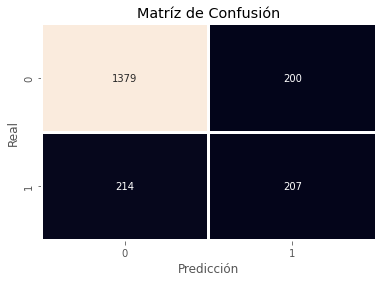

In [ ]:
# Matriz de Confusión
print("Matriz de confusión")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

df_cm = pd.crosstab(df_predicciones['Real'], df_predicciones['prediccion'], rownames=['Real'], colnames=['Predicción'])
sns.heatmap(df_cm, annot=True, fmt="d", linewidths=2, cbar=False)
plt.title("Matríz de Confusión")
plt.show()


AUC:  0.6802224565594449
AUC: 0.68


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


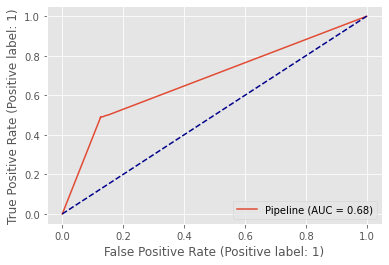

In [ ]:
# Probabilidad
probs = tree_pipeline.predict_proba(X_test)
probs = probs[:,1]

auc = roc_auc_score(y_test, probs)
print('AUC: ', auc) 
print('AUC: %.2f' % auc)

# Curva ROC
plot_roc_curve(tree_pipeline, X_test, y_test)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


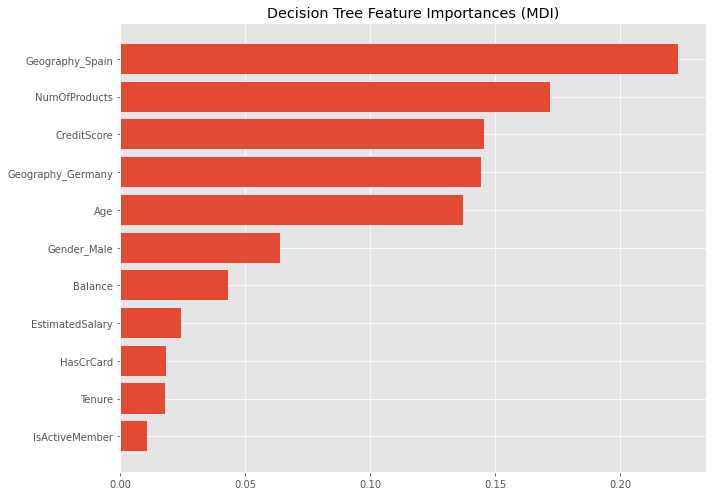

In [ ]:
# SABER LA IMPORTANCIA DE LAS CARACTERISTICAS
feature_names = tree_pipeline.steps[0][1].named_transformers_['cat']['OneHot'].get_feature_names(categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (
    tree_pipeline.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,7))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Decision Tree Feature Importances (MDI)")
fig.tight_layout()
plt.show()

## Random Forest

In [ ]:
# Definiendo el Pipeline
rf_pipeline =  my_pipeline(RandomForestClassifier(n_estimators=50, 
                                                  max_depth=10,
                                                  criterion='entropy',
                                                  class_weight="balanced"))

In [ ]:
# Pipeline
rf_pipeline.fit(X_train_rus, y_train_rus)
print("model score: %.3f" % rf_pipeline.score(X_train_rus, y_train_rus))
print("model score: %.3f" % rf_pipeline.score(X_test, y_test))

model score: 0.893
model score: 0.826


In [ ]:
# Predicciones del modelo
y_pred = rf_pipeline.predict(X_test)

# Accuracy
print(accuracy_score(y_test, y_pred))

# Precision
print(precision_score(y_test, y_pred))

# Recall
print(recall_score(y_test, y_pred)) 
    
# f1 score
print(f1_score(y_test, y_pred))

# Reporte    
print(classification_report(y_test, y_pred))

0.8255
0.5728744939271255
0.672209026128266
0.6185792349726776
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1579
           1       0.57      0.67      0.62       421

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



In [ ]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'Real' : y_test, 'prediccion' : y_pred})
df_predicciones.head()

,Real,prediccion
1955,1,1
8233,0,0
156,0,0
8623,0,0
6962,0,0


Matriz de confusión
[[1368  211]
 [ 138  283]]


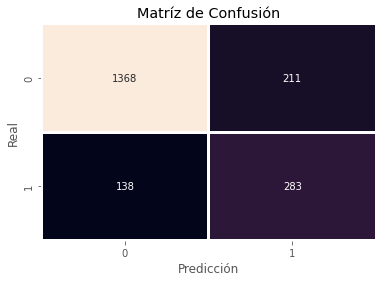

In [ ]:
# Matriz de Confusón
print("Matriz de confusión")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

df_cm = pd.crosstab(df_predicciones['Real'], df_predicciones['prediccion'], rownames=['Real'], colnames=['Predicción'])
sns.heatmap(df_cm, annot=True, fmt="d", linewidths=2, cbar=False)
plt.title("Matríz de Confusión")
plt.show()

AUC:  0.8663229832164739
AUC: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


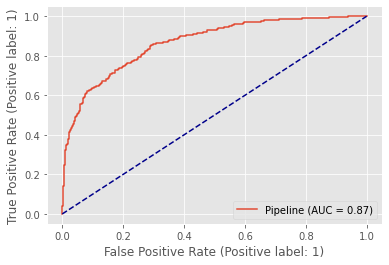

In [ ]:
# Probabilidad
probs = rf_pipeline.predict_proba(X_test)
probs = probs[:,1]

auc = roc_auc_score(y_test, probs)
print('AUC: ', auc) 
print('AUC: %.2f' % auc)

plot_roc_curve(rf_pipeline, X_test, y_test)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [ ]:
param_distributions = {
    'classifier__max_depth'   : [None, 3, 5, 10, 20]
}
grid = GridSearchCV(rf_pipeline, param_distributions, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc')

grid_result = grid.fit(X_train_rus, y_train_rus)
best_params = grid_result.best_params_

# Best accuracy
print('Best accuracy: %.3f' % grid.best_score_)

# Best params
print('\nBest params:\n', grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best accuracy: 0.996

Best params:
 {'classifier__max_depth': None}


In [ ]:
# Dataset transformado
encoded_cat = rf_pipeline.steps[0][1].named_transformers_['cat']['OneHot'].get_feature_names(categorical_features)
labels = np.concatenate([numeric_features, encoded_cat])
datos_train_prep = preprocessor.transform(X_train_rus)
#datos_train_prep = pd.DataFrame(datos_train_prep.toarray(), columns=labels)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.472559,0.472234,0.357006,-1.331683,0.718382,0.647775,-0.910619,1.639578,0.0,0.0,1.0
1,1.797461,0.000893,0.014383,1.050309,0.718382,-1.543745,-0.910619,1.389824,0.0,1.0,1.0
2,-0.547921,-0.187643,1.384873,0.886962,-0.756976,0.647775,1.098155,0.883466,0.0,0.0,0.0
3,0.436936,0.189430,-1.013484,-0.209296,0.718382,-1.543745,-0.910619,1.106711,1.0,0.0,0.0
4,-2.304420,0.000893,0.357006,1.160449,-0.756976,0.647775,-0.910619,-1.547847,0.0,0.0,1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


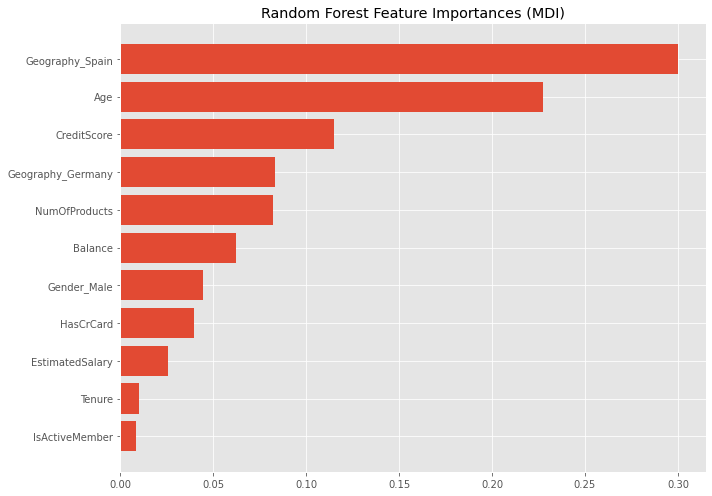

In [ ]:
# SABER LA IMPORTANCIA DE LAS CARACTERISTICAS
feature_names = rf_pipeline.steps[0][1].named_transformers_['cat']['OneHot'].get_feature_names(categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (
    rf_pipeline.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,7))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

## XGBClassifier

In [ ]:
XGBC_pipeline =  my_pipeline(XGBClassifier(n_estimators = 450, 
                                           learning_rate = 0.001, 
                                           subsample = 0.8, 
                                           max_depth = 10, 
                                           colsample_bytree = 0.8
                                          ))

In [ ]:
%%time
# Pipeline
XGBC_pipeline.fit(X_train_rus, y_train_rus)
print("model score: %.3f" % XGBC_pipeline.score(X_train_rus, y_train_rus))
print("model score: %.3f" % XGBC_pipeline.score(X_test, y_test))

model score: 0.925
model score: 0.826
CPU times: user 10.3 s, sys: 207 ms, total: 10.5 s
Wall time: 10.7 s


In [ ]:
from sklearn.neural_network import MLPClassifier
# Definiendo el Pipeline
MLP_pipeline =  my_pipeline(MLPClassifier((25,), activation='relu', learning_rate='adaptive'))


# Pipeline
MLP_pipeline.fit(X_train_rus, y_train_rus)
print("model score: %.3f" % MLP_pipeline.score(X_train_rus, y_train_rus))
print("model score: %.3f" % MLP_pipeline.score(X_test, y_test))

model score: 0.797
model score: 0.788


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Parte 2 - Construir la RNA




In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
# create a function that returns a model, taking as parameters things you
# want to verify using cross-valdiation and model selection
#from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer="adam",
                 kernel_initializer="uniform", 
                 rate=0.1):
    model = Sequential()
    model.add(Dense(units = 6, kernel_initializer =  kernel_initializer,  
                     activation = "relu", input_dim = 11)) # 11 inputs

    model.add(Dropout(rate = rate))
    model.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
    model.add(Dropout(rate = rate))
    model.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# wrap the model using the function you created
#clf = KerasClassifier(build_fn=create_model, batch_size = 10, epochs = 100)
clf = KerasClassifier(model=create_model, batch_size = 10, epochs = 100)

In [ ]:
Red_pipeline =  my_pipeline(clf)
Red_pipeline.fit(X_train, y_train)

Epoch 1/100
800/800 [==============================] - 8s 6ms/step - loss: 0.4819 - accuracy: 0.7980
Epoch 2/100
800/800 [==============================] - 4s 6ms/step - loss: 0.4379 - accuracy: 0.7980
Epoch 3/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4310 - accuracy: 0.7980
Epoch 4/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4242 - accuracy: 0.7980
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4265 - accuracy: 0.7980
Epoch 6/100
800/800 [==============================] - 5s 6ms/step - loss: 0.4225 - accuracy: 0.8142
Epoch 7/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4256 - accuracy: 0.8259
Epoch 8/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4220 - accuracy: 0.8255
Epoch 9/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4232 - accuracy: 0.8285
Epoch 10/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4203 - accura

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 KerasClassifier(batch_size=10, epochs=100, model=<function create_model at 0x7fc6bc8b3680>))])

In [ ]:
Red_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 KerasClassifier(batch_size=10, epochs=100, model=<function create_model at 0x7fc6bc8b3680>))])

## Parte 3 - Evaluar el modelo y calcular predicciones finales


In [ ]:
#Red_pipeline.fit(X_train_rus, y_train_rus)
print("model score: %.3f" % Red_pipeline.score(X_train_rus, y_train_rus))
print("model score: %.3f" % Red_pipeline.score(X_test, y_test))

1277/1277 [==============================] - 2s 2ms/step
model score: 0.628
200/200 [==============================] - 0s 2ms/step
model score: 0.838


In [ ]:
y_pred  = Red_pipeline.predict(X_test)
#y_pred = (y_pred>0.5)

200/200 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'Real' : y_test, 'prediccion' : y_pred.flatten()})
df_predicciones.head()

,Real,prediccion
1955,1,1
8233,0,0
156,0,0
8623,0,0
6962,0,0


Matriz de confusión
[[1539   40]
 [ 262  159]]


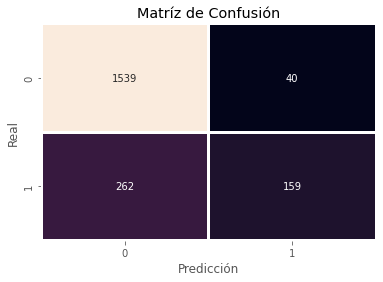

In [ ]:
# Matriz de Confusón
print("Matriz de confusión")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

df_cm = pd.crosstab(df_predicciones['Real'], df_predicciones['prediccion'], rownames=['Real'], colnames=['Predicción'])
sns.heatmap(df_cm, annot=True, fmt="d", linewidths=2, cbar=False)
plt.title("Matríz de Confusión")
plt.show()

AUC:  0.858818007729117
AUC: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


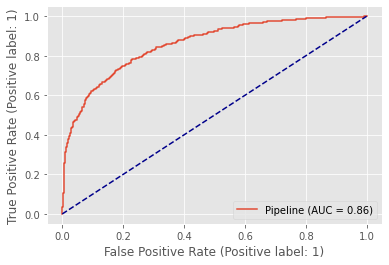

In [ ]:
# Probabilidad
probs = rf_pipeline.predict_proba(X_test)
probs = probs[:,1]

auc = roc_auc_score(y_test, probs)
print('AUC: ', auc) 
print('AUC: %.2f' % auc)

plot_roc_curve(rf_pipeline, X_test, y_test)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [ ]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1579
           1       0.80      0.38      0.51       421

    accuracy                           0.85      2000
   macro avg       0.83      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [ ]:
# Guardar el modelo
joblib.dump(Red_pipeline, 'model_red.joblib')

INFO:tensorflow:Assets written to: ram:///tmp/tmp9n_my4mx/assets


['model_red.joblib']

# Evaluar una persona

Geografia: Francia

Puntaje de crédito: 600

Género masculino

Edad: 40 años de edad

Tenencia: 3 años.

Saldo: $ 60000

Número de productos: 2

¿Este cliente tiene una tarjeta de crédito? Sí

¿Es este cliente un miembro activo? Sí

Salario estimado: $ 50000

Entonces, ¿deberíamos decir adiós a ese cliente?

In [ ]:
X_test.iloc[0:1,:] # Pare ver los encabezados
# para evaluar debe estar en formato de DataFrame

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1955,565,Germany,Female,58,3,108888.24,3,0,1,135875.51


In [ ]:
Red_pipeline.predict(X_test.iloc[0:1,:])

1/1 [==============================] - 0s 30ms/step


array([1])

In [ ]:
# Para predecir un registro
predice_uno = pd.DataFrame(
    np.array([[600,"France","Male",40,3,60000,2,1,1,50000]]),columns=X_test.columns, 
)
# podrias poner np.array([600,"France","Male",40,3,60000,2,1,1,50000].reshape(1,-1))

In [ ]:
predice_uno # debe estar en formato de DataFrame

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,Male,40,3,60000,2,1,1,50000


In [ ]:
Red_pipeline.predict(predice_uno)

1/1 [==============================] - 0s 58ms/step


array([0])

In [ ]:
Red_pipeline.predict_proba(predice_uno)

1/1 [==============================] - 0s 26ms/step


array([0.91251606, 0.08748394], dtype=float32)

In [ ]:
# predecir más
predice_varios = pd.DataFrame(
    np.array([[600,"France","Male",40,3,60000,2,1,1,50000],
             [500,"Germany","Female",20,4,30000,2,1,1,40000],
              [100,"Germany","Female",56,4,30000,0,0,0,20000]]
            ),columns=X_test.columns, 
)
predice_varios

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,Male,40,3,60000,2,1,1,50000
1,500,Germany,Female,20,4,30000,2,1,1,40000
2,100,Germany,Female,56,4,30000,0,0,0,20000


In [ ]:
Red_pipeline.predict(predice_varios)

1/1 [==============================] - 0s 41ms/step


array([0, 0, 1])

In [ ]:
Red_pipeline.predict_proba(predice_varios)

1/1 [==============================] - 0s 37ms/step


array([[0.91251606, 0.08748394],
       [0.9684711 , 0.0315289 ],
       [0.42308623, 0.5769138 ]], dtype=float32)

In [ ]:
accuracies = cross_val_score(estimator=Red_pipeline, X = X_train, y = y_train, cv = 5, n_jobs=-1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.9min finished


In [ ]:
accuracies

array([0.845   , 0.829375, 0.84625 , 0.841875, 0.8275  ])

In [ ]:
mean = accuracies.mean()
variance = accuracies.std()
print(mean)
print(variance)

0.8379999999999999
0.007958878689865794


In [ ]:
# Para ver los parámetros que puedes tunerar
Red_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer_num', 'preprocessor__num__scaler', 'preprocessor__num__imputer_num__add_indicator', 'preprocessor__num__imputer_num__copy', 'preprocessor__num__imputer_num__fill_value', 'preprocessor__num__imputer_num__missing_values', 'preprocessor__num__imputer_num__strategy', 'preprocessor__num__imputer_num__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer_cat', 'preproces

In [ ]:
# OJO AQUÍ SE DEBEN DE TOMAR LOS QUE SALEN UTILIZANDO: Red_pipeline.get_params().keys()
parameters = {
    'classifier__batch_size' : [25,32],  
    'classifier__epochs' : [100, 500], 
    'classifier__optimizer' : ['adam', 'rmsprop']
}

In [ ]:
grid_search = GridSearchCV(estimator = Red_pipeline, 
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 10)

In [ ]:
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 49/500
288/288 [==============================] - 1s 5ms/step - loss: 0.4179 - accuracy: 0.8318
Epoch 50/500
288/288 [==============================] - 1s 5ms/step - loss: 0.4175 - accuracy: 0.8306
Epoch 51/500
288/288 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.8324
Epoch 52/500
288/288 [==============================] - 1s 5ms/step - loss: 0.4176 - accuracy: 0.8304
Epoch 53/500
288/288 [==============================] - 1s 5ms/step - loss: 0.4151 - accuracy: 0.8311
Epoch 54/500
288/288 [==============================] - 1s 4ms/step - loss: 0.4184 - accuracy: 0.8306
Epoch 55/500
288/288 [==============================] - 1s 4ms/step - loss: 0.4183 - accuracy: 0.8324
Epoch 56/500
288/288 [==============================] - 1s 5ms/step - loss: 0.4183 - accuracy: 0.8331
Epoch 57/500
288/288 [==============================] - 1s 5ms/step - loss: 0.4157 - accuracy: 0.8329
Epoch 58/500
288/288 

In [ ]:
print(best_parameters)
print(best_accuracy)